## New RMS Calculation for Spike trains

In [1]:
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import gitInformation

In [2]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-11-15
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\IpythonNotebook\kt-2015-DSPHandsOn\.git
Current git SHA: 8bd95795b66b6beab499b0a2c829d11705e8d7fb
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [3]:
%matplotlib inline

### Simulate a Spike using a triangle signal

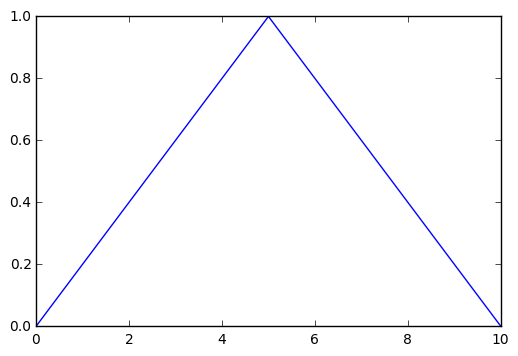

In [4]:
# Generate a triangle and normalize it.
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri = tri/5.
plt.plot(tri)

### Generate a noised spike train 

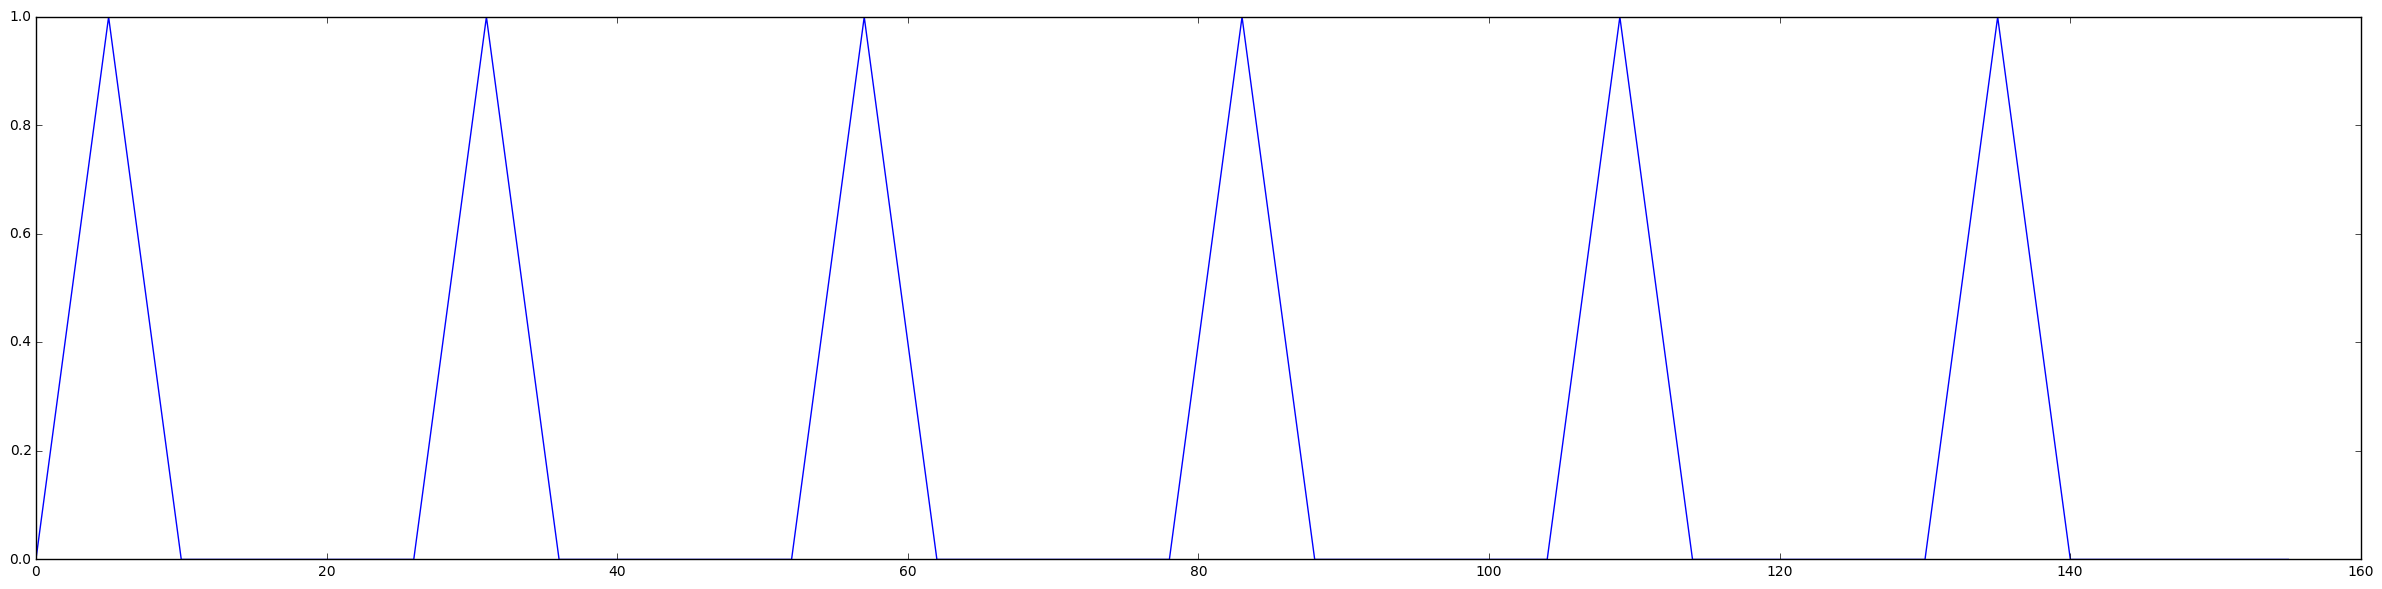

In [5]:
# Generate a spike train with a gap of 15 samples between spikes. 
x = np.zeros(15)
data = np.append(tri,x)
for i in range (5):
    data = np.append(data,tri)
    data = np.append(data,x)
plt.figure(figsize =(30,7))
plt.plot(data)

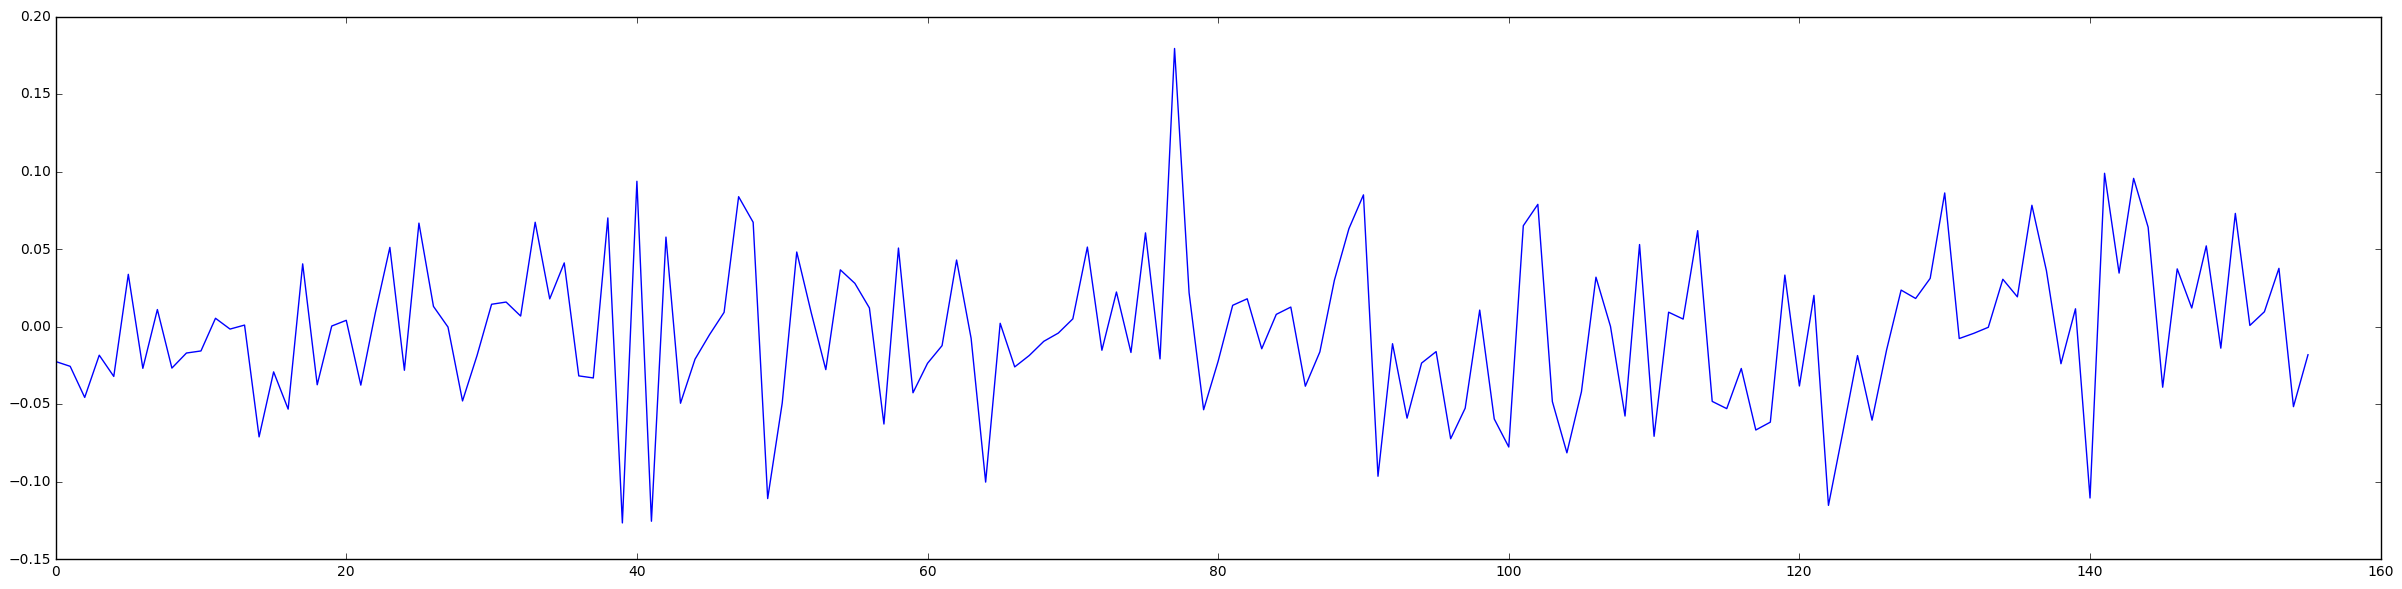

In [6]:
# Generate white Gaussian noise with a standard deviation of 0.05 and the center at 0.
noise = np.random.normal(0, 0.05, len(data))
plt.figure(figsize=(30,7))
plt.plot(noise)

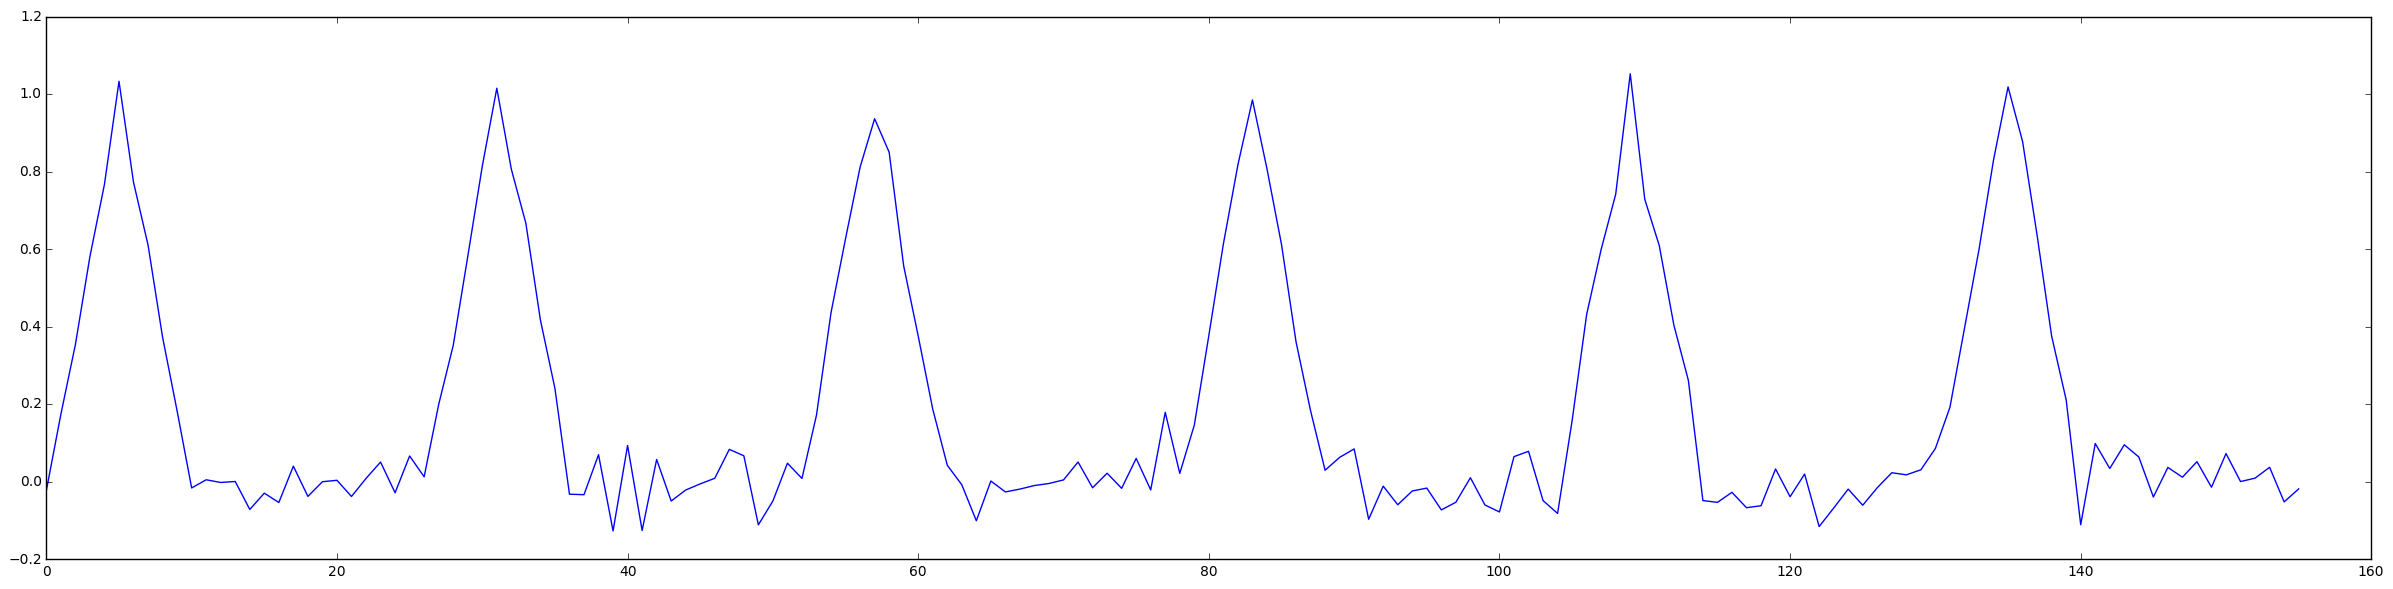

In [7]:
# Add signal and noise. 
noised_data = data + noise
plt.figure(figsize=(30,7))
plt.plot(noised_data)

###  Filter the noised signal with a median filter

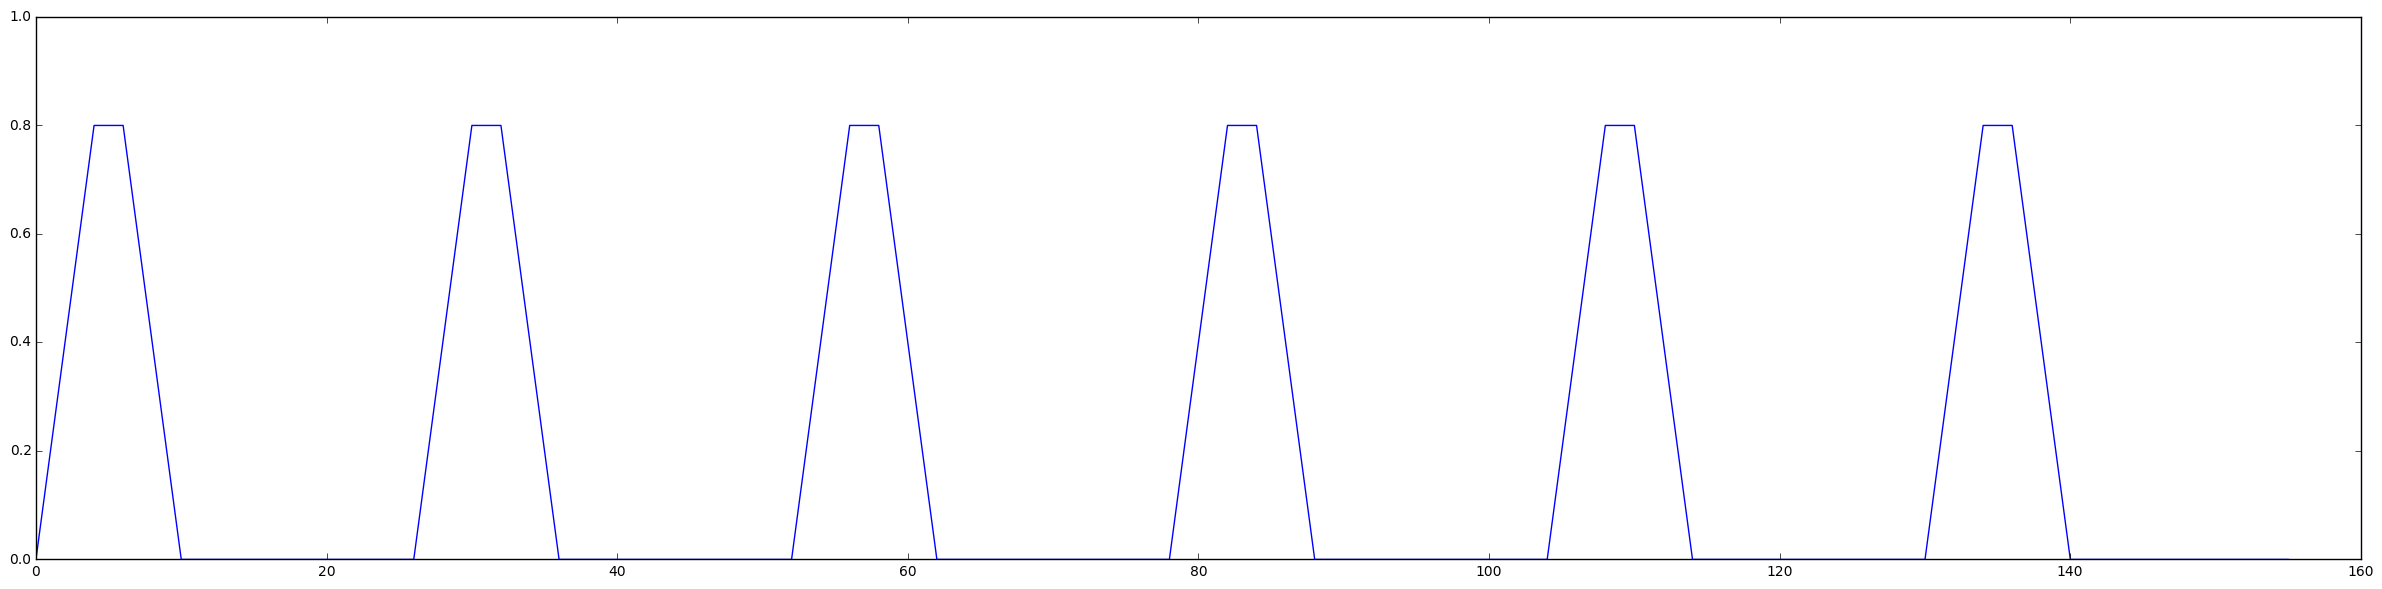

In [8]:
# Use the median filter with a window length of 5 for the normal signal without noise-
A_filt = medfilt(data,5)
plt.figure(figsize=(30,7))
plt.ylim([0,1])
plt.plot(A_filt)

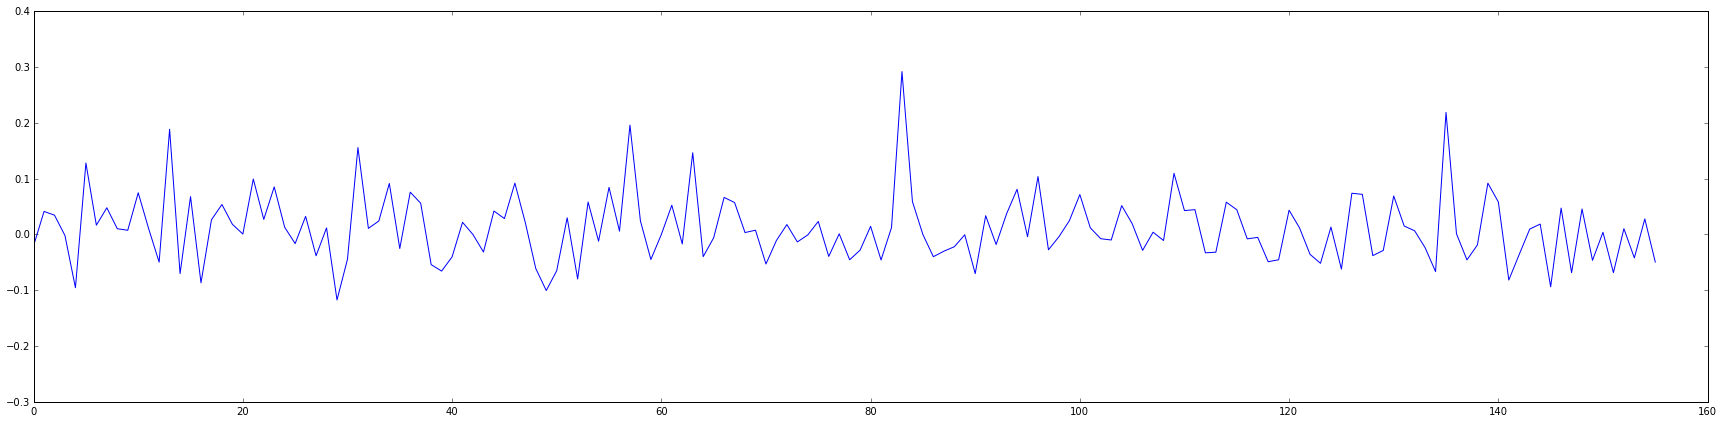

In [10]:
# Afterwards we subtract the filtered signal from the noised signal.
b_filt = noised_data - A_filt
plt.figure(figsize=(30,7))
plt.ylim([-0.3,0.4])
plt.plot(b_filt)

### Use the median filter with multiple window lengths and calculate the RMS

In [9]:
wl = np.array([3, 5, 11, 15, 17, 21, 25, 31, 35, 39, 45, 47, 51, 55, 57, 61, 75])

In [10]:
filtered = np.zeros((140, len(data)))
filtered_spikes = np.zeros((140, len(data)))
rms = np.zeros(140)
values1 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered_spikes)):
        data1_noised = data + np.random.normal(0, 0.3, len(data))
        filtered[i,:] = medfilt(data, w)
        filtered_spikes[i,:] = data1_noised - filtered[i,:]
        #rms[i] = np.sqrt(np.mean(np.square(filtered[i,:])))
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values1[count] = mean 

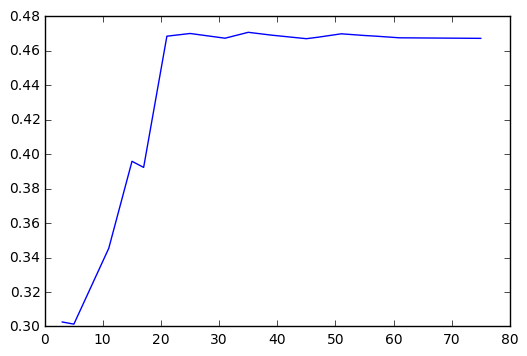

In [11]:
plt.plot(wl, values1)